# APIs and Python


## The Many Use Cases For APIs

APIs can be used for many things - much more than just retrieving information. Twilio has an API that allows you to write a script to send text messages to people. GitHub has an API for creating new repositories. Many services have APIs allowing computers to automate tasks that a person might otherwise have to do through a website - whether uploading a photo to Flickr, searching for a company name in a state database, or getting a list of garbage collection times for a municipality.

### Learning Goals:

  - Identify and discuss APIs
  - Discuss and explain different request (GET, POST, PUT, DELETE) and CRUD operations
  - Explore the attributes of a response object
  - Check the status of a request and interpret status codes
  - Access data from an API using the requests library
  - Create a pandas dataframe from the data returned from an API and visualize the data


## Limitations of APIs

When working with APIs, there are some limitations you have to be aware of - especially relating to scope and scale.

* **Scope** - Just because a company has an API and has information, it doesn't mean you can get all of the information through their API. 

* **Scale** - Some APIs are provided for free as a public service. Others you have to pay for, or allow you to perform activities (like sending a text message) that you pay for. Make sure that you know what the rate limits are and that your use case isn't going to need more API calls than you will be able to make.

What else is good to know? Every API is different! There are some standards out there in terms of documentation and usage... but it's like the wild west - rapid expansion with few rules.

With all that out of the way - Let's take a look at the `requests` library and its uses.

### "Requests is the only Non-GMO HTTP library for Python, safe for human consumption."

> "Requests allows you to send organic, grass-fed HTTP/1.1 requests, without the need for manual labor."

Straight from the `requests` [documentation](https://pypi.org/project/requests/)

### Let's get started!

In [1]:
import requests

In [ ]:
# Don't already have the library? Uncomment the below code and install it
#!pip install requests

### Types of requests

We will mostly use GET requests in order to get data, but there are other options.

![CRUD image from IntelliPaat](https://intellipaat.com/mediaFiles/2015/08/MongoDB-CRUD-operations.jpg)

That's right - CRUD summarizes the kinds of requests you can make with most APIs. 

Let's say you are looking at an API for a car rental company like Hertz or Zipcar - the following different requests could generate these different responses:

| Request               | Result                               | In CRUD Terms |
| --------------------- | ------------------------------------ | ------------- |
| GET /stores/          | User sees the list of stores         | Read          |
| GET /rentals/         | User sees the history of car rentals | Read          |
| POST /rentals/        | User rents a car                     | Create        |
| PUT /rentals/{id}/    | User changes destination store       | Update        |
| DELETE /rentals/{id}/ | User cancels the active car rental   | Delete        |


### Request Class and Attributes

In [2]:
# Create a GET request, then check the type of object

r = requests.get('https://api.github.com/events') 
type(r)

requests.models.Response

In [3]:
# So what does this look like?
r.text

'[{"id":"10991521721","type":"PushEvent","actor":{"id":8164534,"login":"DerekCL","display_login":"DerekCL","gravatar_id":"","url":"https://api.github.com/users/DerekCL","avatar_url":"https://avatars.githubusercontent.com/u/8164534?"},"repo":{"id":225287363,"name":"DerekCL/AmazonFlaskApp","url":"https://api.github.com/repos/DerekCL/AmazonFlaskApp"},"payload":{"push_id":4344829026,"size":1,"distinct_size":1,"ref":"refs/heads/master","head":"8d6b9df3c1c3569e9ffc439d174ac49f42c0fea4","before":"be483ca0e163d7a0a893696fc557b803450df926","commits":[{"sha":"8d6b9df3c1c3569e9ffc439d174ac49f42c0fea4","author":{"email":"derek.lewandowski@coda.global","name":"derek.lewandowski"},"message":"returning simple hello world","distinct":true,"url":"https://api.github.com/repos/DerekCL/AmazonFlaskApp/commits/8d6b9df3c1c3569e9ffc439d174ac49f42c0fea4"}]},"public":true,"created_at":"2019-12-02T17:07:21Z"},{"id":"10991521713","type":"PushEvent","actor":{"id":57900031,"login":"bestfingame","display_login":"bes

![Oh good heavens gif, from gfycat](https://thumbs.gfycat.com/ColdAmbitiousDogwoodtwigborer-size_restricted.gif)

Obviously you're never going to just scan that quickly for any data you need, we need to wrangle that response to make it usable.

But first, let's look at some of the other attributes of `requests.models.Response` objects.

We can check out all of the attributes [here](https://2.python-requests.org//en/v0.10.6/api/) in the documentation.

In [4]:
# Another attribute, what does this show us?
r.headers

{'Server': 'GitHub.com', 'Date': 'Mon, 02 Dec 2019 17:12:21 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Status': '200 OK', 'X-RateLimit-Limit': '60', 'X-RateLimit-Remaining': '53', 'X-RateLimit-Reset': '1575309565', 'Cache-Control': 'public, max-age=60, s-maxage=60', 'Vary': 'Accept', 'ETag': 'W/"c82d424e2a4b7ac42033f396089379fd"', 'Last-Modified': 'Mon, 02 Dec 2019 17:07:21 GMT', 'X-Poll-Interval': '60', 'X-GitHub-Media-Type': 'github.v3; format=json', 'Link': '<https://api.github.com/events?page=2>; rel="next", <https://api.github.com/events?page=10>; rel="last"', 'Access-Control-Expose-Headers': 'ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains; preload', 'X-Frame-Options': 'deny', 'X-Content-Type-O

### Checking out the status of your request

In [5]:
# Another attribute
r.status_code

200

### [Types of status codes](https://http.cat/)

1xx - Informational responses

2xx - Success
- 200 OK
- 201 Created
- 204 No Content

3xx - Redirection

- 301 Moved Permanently (permanent URL redirection)
- 304 Not Modified (A conditional GET or HEAD request has been received and would have resulted in a 200 OK response if it were not for the fact that the condition evaluated to false.)

4xx - Client errors

- 400 Bad Request
- 401 Unauthorized
- 403 Forbidden
- 404 Not Found

5xx - Server errors

- 500 Internal Server Error

In [6]:
# Get status code for a "broken" link

r_broken = requests.get('https://api.github.com/fake-ending')
r_broken.status_code

404

Can also explictly ask for the returned format to be json as a method.

In [7]:
# Going back to our working request - how does this look, compared to text?
r.json()

[{'id': '10991521721',
  'type': 'PushEvent',
  'actor': {'id': 8164534,
   'login': 'DerekCL',
   'display_login': 'DerekCL',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/DerekCL',
   'avatar_url': 'https://avatars.githubusercontent.com/u/8164534?'},
  'repo': {'id': 225287363,
   'name': 'DerekCL/AmazonFlaskApp',
   'url': 'https://api.github.com/repos/DerekCL/AmazonFlaskApp'},
  'payload': {'push_id': 4344829026,
   'size': 1,
   'distinct_size': 1,
   'ref': 'refs/heads/master',
   'head': '8d6b9df3c1c3569e9ffc439d174ac49f42c0fea4',
   'before': 'be483ca0e163d7a0a893696fc557b803450df926',
   'commits': [{'sha': '8d6b9df3c1c3569e9ffc439d174ac49f42c0fea4',
     'author': {'email': 'derek.lewandowski@coda.global',
      'name': 'derek.lewandowski'},
     'message': 'returning simple hello world',
     'distinct': True,
     'url': 'https://api.github.com/repos/DerekCL/AmazonFlaskApp/commits/8d6b9df3c1c3569e9ffc439d174ac49f42c0fea4'}]},
  'public': True,
  'created_at'

#### A note on errors and exceptions with the Requests library

There are a number of exceptions and error codes you need to be familiar with when using the Requests library in Python.

- The Requests library will raise a ConnectionError exception if there is a network problem like a DNS failure, or refused connection.
- These are rare, but with invalid HTTP responses, Requests will also raise an HTTPError exception. 
- A Timeout exception will be raised if a request times out.
- If and when a request exceeds the preconfigured number of maximum redirections, then a TooManyRedirects exception will be raised

## Another Way to Deal with APIs

Check out [Postman](https://www.getpostman.com/).

(Cue Lindsey showing you how to use Postman with the [Dark Sky API](https://darksky.net/dev))

In [10]:
import json

In [11]:
def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [13]:
api_key_path = get_keys("/Users/lberlin/secrets/api.json")

In [23]:
ds_key = list(api_key_path.values())[0]

In [25]:
hou_lat = "29.7604"
hou_long = "-95.3698"

In [26]:
url = f"https://api.darksky.net/forecast/{ds_key}/{hou_lat},{hou_long}"

In [ ]:
# url = "https://api.darksky.net/forecast/{}/{},{}".format(ds_key, hou_lat, hou_long)

In [27]:
ds_r = requests.get(url) 

In [33]:
ds_r.json()["currently"]

{'time': 1575308667,
 'summary': 'Clear',
 'icon': 'clear-day',
 'precipIntensity': 0,
 'precipProbability': 0,
 'temperature': 58.03,
 'apparentTemperature': 58.03,
 'dewPoint': 25.91,
 'humidity': 0.29,
 'pressure': 1025.8,
 'windSpeed': 11.04,
 'windGust': 11.04,
 'windBearing': 341,
 'cloudCover': 0.08,
 'uvIndex': 4,
 'visibility': 10,
 'ozone': 276.6}

## Back to the requests Library: Another Example

To start, go over to the API documentation [here](https://dev.socrata.com/foundry/data.cityofnewyork.us/fhrw-4uyv)

![311 api documentation screenshot](311_api_docs.png)

### Make an initial API call to retrieve 311 complaints from a zip code of your choice in New York City

We arrived at this URL by checking out the documentation here [here](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9) and clicking API.

In [34]:
import requests
import pandas as pd

# Defining the variable to be changed
zip_code = '11004' # you can put any NYC zip code here
url = "https://data.cityofnewyork.us/resource/fhrw-4uyv.json?incident_zip={}".format(zip_code)

# Pull from the API
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
else:
    print('Hit an error.')

### Briefly explore the structure of the response you received

In [35]:
# What type is our data?
print(type(data))

<class 'list'>


In [36]:
# Size?
len(data)

1000

In [37]:
# Let's check one of the items out
data[20]

{'unique_key': '45024065',
 'created_date': '2019-11-26T17:56:37.000',
 'agency': 'DOT',
 'agency_name': 'Department of Transportation',
 'complaint_type': 'Street Condition',
 'descriptor': 'Cave-in',
 'location_type': 'Street',
 'incident_zip': '11004',
 'incident_address': '79-47 263 STREET',
 'street_name': '263 STREET',
 'cross_street_1': '79 AVENUE',
 'cross_street_2': '80 AVENUE',
 'intersection_street_1': '79 AVENUE',
 'intersection_street_2': '80 AVENUE',
 'city': 'GLEN OAKS',
 'landmark': '263 STREET',
 'status': 'In Progress',
 'resolution_description': 'The Department of Transportation will inspect the condition and will determine the next action.',
 'resolution_action_updated_date': '2019-11-27T14:28:18.000',
 'community_board': '13 QUEENS',
 'bbl': '4087000008',
 'borough': 'QUEENS',
 'x_coordinate_state_plane': '1064963',
 'y_coordinate_state_plane': '211338',
 'open_data_channel_type': 'PHONE',
 'park_facility_name': 'Unspecified',
 'park_borough': 'QUEENS',
 'latitude'

### Create a DataFrame of the data from the response

In [38]:
df = pd.DataFrame(data)

In [42]:
# Let's look at some details
print(len(df))
print(df.columns)
df.tail()

1000
Index(['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name',
       'complaint_type', 'descriptor', 'location_type', 'incident_zip',
       'incident_address', 'street_name', 'cross_street_1', 'cross_street_2',
       'intersection_street_1', 'intersection_street_2', 'city', 'landmark',
       'status', 'resolution_description', 'resolution_action_updated_date',
       'community_board', 'bbl', 'borough', 'x_coordinate_state_plane',
       'y_coordinate_state_plane', 'open_data_channel_type',
       'park_facility_name', 'park_borough', 'latitude', 'longitude',
       'location', 'location_address', 'location_city', 'location_state',
       'location_zip', 'address_type', 'facility_type', 'due_date',
       'taxi_pick_up_location'],
      dtype='object')


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,...,longitude,location,location_address,location_city,location_state,location_zip,address_type,facility_type,due_date,taxi_pick_up_location
995,40641297,2018-10-24T09:48:46.000,2018-11-07T10:03:49.000,DOT,Department of Transportation,Street Sign - Dangling,St Name - Attached to Pole,Street,11004,NaN,...,-73.71370109072407,"{'type': 'Point', 'coordinates': [-73.71370109...",,,,,INTERSECTION,N/A,2018-11-08T11:15:23.000,NaN
996,40632793,2018-10-23T13:50:38.000,2018-10-24T01:30:31.000,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11004,79-03 262 STREET,...,-73.70985172513718,"{'type': 'Point', 'coordinates': [-73.70985172...",,,,,ADDRESS,Precinct,2018-10-23T21:50:38.000,NaN
997,40632061,2018-10-23T14:47:24.000,2018-10-24T16:43:13.000,DOT,Department of Transportation,Street Condition,Failed Street Repair,Street,11004,82-45 261 STREET,...,-73.7084862412389,"{'type': 'Point', 'coordinates': [-73.70848624...",,,,,ADDRESS,N/A,NaN,NaN
998,40622425,2018-10-22T16:35:59.000,2018-12-12T14:15:23.000,DPR,Department of Parks and Recreation,Dead/Dying Tree,Planted More Than 2 Years Ago,Street,11004,80-20 257 STREET,...,-73.71362888723172,"{'type': 'Point', 'coordinates': [-73.71362888...",,,,,ADDRESS,N/A,2018-11-15T09:22:40.000,NaN
999,40622424,2018-10-22T17:57:22.000,2018-10-23T09:21:40.000,DPR,Department of Parks and Recreation,Dead/Dying Tree,Planted More Than 2 Years Ago,Street,11004,82-02 256 STREET,...,-73.71324760769916,"{'type': 'Point', 'coordinates': [-73.71324760...",,,,,ADDRESS,N/A,2018-10-29T17:57:22.000,NaN


### Create a Chart of Complaint Types 

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

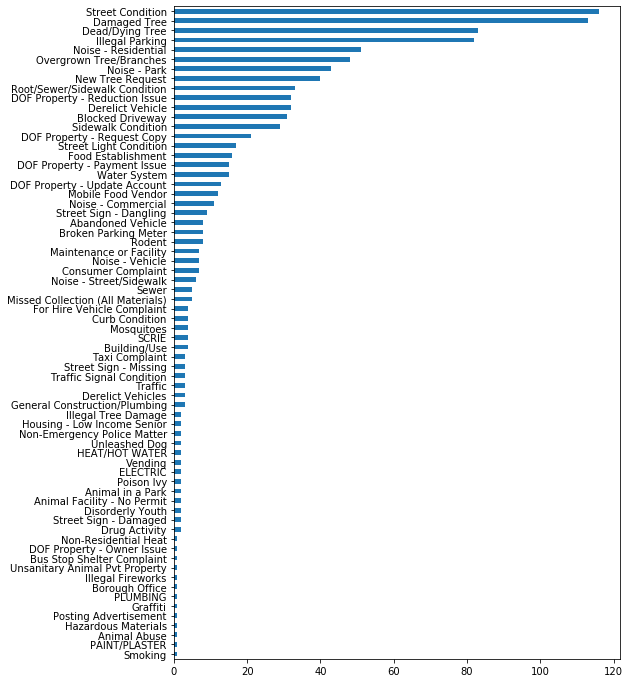

In [43]:
# Can you break down how this plot is generated?
df.complaint_type.value_counts(ascending=True).plot(kind='barh', figsize=(8,12))
plt.show()

## Extra credit - Further Practice

There are many ways to access data through APIs! [Sodapy](https://github.com/xmunoz/sodapy) is the Python client for the Socrata Open Data API.

In [ ]:
# Install before running 
# !pip install sodapy

#### Tokenize yourself!

https://dev.socrata.com/foundry/data.cityofnewyork.us/fhrw-4uyv

Scroll down and click to sign up for an app token! No credit cards required!

In [ ]:
token = '' # paste your token here 

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", token)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("fhrw-4uyv", incident_zip = '11004', limit=1000)

In [ ]:
type(results)

In [ ]:
len(results)

In [ ]:
results[0]

In [ ]:
df_soda = pd.DataFrame(results)

print(len(df_soda))
print(df_soda.columns)
df_soda.head()

## Even Further Practice

https://github.com/toddmotto/public-apis

Find a buddy, find a free api, get a key, and do a GET. Try to transform the response into a dataframe.